In [1]:
from models.model3 import linear_multiplicative_cooling, linear_additive_cooling, logarithmic_multiplicative_cooling
from models.model3 import BaseModel
from src.variables import sector, K, demands, coords, T, EM,a , b, service_time, N, Q_MAX
from src.graph import draw_graph
import time
import numpy as np

In [2]:
sector

,Punto de colecta,Latitud,Longitud,X_Longitude,Y_Latitude,UTM_X,UTM_Y,X,Y,demanda,service_time,a,b
0,d1,"8°06'16""S","79°02'12""W",8.104444,79.036667,716343.248686,9.103633e+06,716.343249,9103.632911,0,0.5,4,15
1,pc151,"8°06'05""S","79°02'28""W",8.101389,79.041111,715854.951993,9.103973e+06,715.854952,9103.973265,1,0.5,7,12
2,pc152,"8°06'06""S","79°02'20""W",8.101667,79.038889,716099.768471,9.103941e+06,716.099768,9103.941357,2,0.5,8,12
3,pc153,"8°06'03""S","79°02'23""W",8.100833,79.039722,716008.351328,9.104034e+06,716.008351,9104.033979,2,0.5,10,14
4,pc154,"8°05'56""S","79°02'23""W",8.098889,79.039722,716009.388578,9.104249e+06,716.009389,9104.249063,1,0.5,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,pc227,"8°05'42""S","79°01'59""W",8.095000,79.033056,716746.369731,9.104676e+06,716.746370,9104.675683,1,0.5,8,12
78,pc228,"8°05'38""S","79°02'09""W",8.093889,79.035833,716440.751469,9.104800e+06,716.440751,9104.800069,1,0.5,5,12
79,pc229,"8°05'35""S","79°02'05""W",8.093056,79.034722,716563.681773,9.104892e+06,716.563682,9104.891656,1,0.5,9,10
80,pc230,"8°05'34""S","79°02'06""W",8.092778,79.035000,716533.208867,9.104923e+06,716.533209,9104.922530,1,0.5,10,13


In [3]:
K

array([0, 1, 2, 3, 4, 5, 6])

In [4]:
model = BaseModel()

created


In [5]:
start_time = time.time()
x0 = model.nearestNeighborHeuristic(80)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")
print(x0)

Tiempo de ejecución: 0.069000244140625 segundos
[30 48 63 70 74 54 51 60 52 75 64  9  6  2  5 10 14 72 65 27 44 66  7  8
 16 24 36 35 28 31 21 20  1 42 58 50 46 56 45 62 69 73 34 29 19 41 55 53
 59 61 80  4  3 15 11 47 78 23 22 43 79 76 77 68 67 71 26 25 37 38 39 17
 18 49 13 40 32 33 57 12]


In [6]:
initial_route, df_summary = model.decoding(x0, summary=True)
df_summary

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,30,0.291399,0.007285,5,8,0.991901,0.008099
1,0,30,48,0.927933,0.023198,5,8,0.966110,0.025791
2,0,48,63,0.370216,0.009255,5,8,0.955820,0.010290
3,0,63,70,0.392968,0.009824,5,8,0.944898,0.010922
4,0,70,74,0.130140,0.003253,5,8,0.941281,0.003617
...,...,...,...,...,...,...,...,...,...
80,4,40,32,0.943464,0.023587,11,15,0.856255,0.026223
81,4,32,33,0.498528,0.012463,8,16,0.842398,0.013856
82,4,33,57,1.425363,0.035634,8,16,0.802782,0.039617
83,4,57,12,1.189290,0.029732,13,15,0.769726,0.033055


In [7]:
model.objective_function(x0)

2.5734008778648914

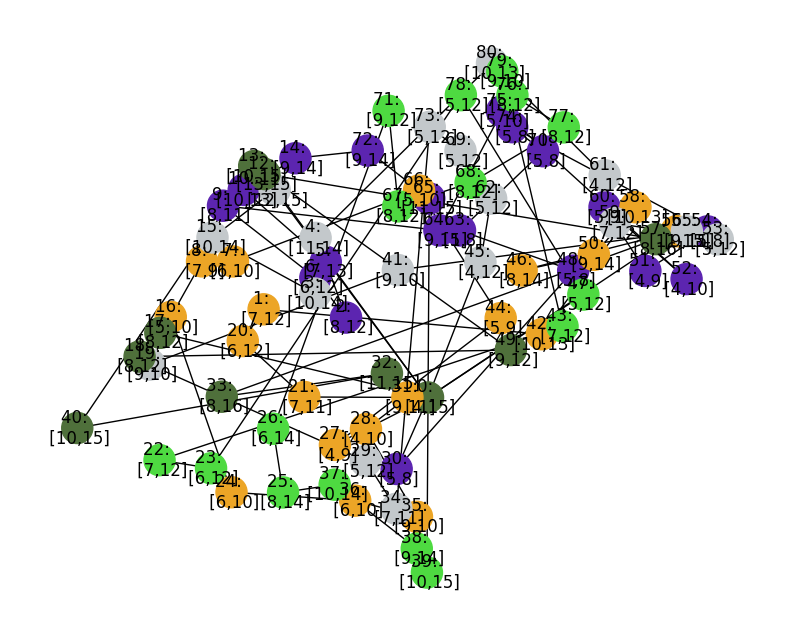

In [8]:
draw_graph(initial_route)

In [30]:
start_time = time.time()
info = model.ga(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 16,
    subPopSize=20,
    MaxGenerations= 150,
    localOptimumTime= 30
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")
print(x0)

generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23
generation: 24
generation: 25
generation: 26
generation: 27
generation: 28
generation: 29
generation: 30
generation: 31
generation: 32
generation: 33
generation: 34
generation: 35
generation: 36
generation: 37
generation: 38
generation: 39
generation: 40
generation: 41
generation: 42
generation: 43
generation: 44
generation: 45
generation: 46
generation: 47
generation: 48
generation: 49
generation: 50
generation: 51
generation: 52
generation: 53
generation: 54
generation: 55
generation: 56
generation: 57
generation: 58
generation: 59
generation: 60
generation: 61
generation: 62
generation: 63
generation: 64
generation: 65
generation: 66
generation: 67
gene

In [31]:
print(info['x_best'])
print(info['e_best'])

[30 48 63 78 74 54 51 45 62 75 64  9  6  2  4 10 14 11 32 47 70 66  7  8
 16 24 36 35 28 31 21 20  1 42 58 50 56 46 44 41 67 71 72 65 60 57 55 53
 59 61 68 73  5  3 37 38 39 52 43 49 79 80 76 77 69 15 13 12 34 29 27 19
 17 18 40 23 22 33 26 25]
1.9094653161650983


In [32]:
optimal_route, df_summary2 = model.decoding(info['x_best'], summary=True)
df_summary2

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,30,0.291399,0.007285,5,8,0.991901,0.008099
1,0,30,48,0.927933,0.023198,5,8,0.966110,0.025791
2,0,48,63,0.370216,0.009255,5,8,0.955820,0.010290
3,0,63,78,0.522354,0.013059,5,12,0.941302,0.014518
4,0,78,74,0.196337,0.004908,5,8,0.935845,0.005457
...,...,...,...,...,...,...,...,...,...
81,5,23,22,0.156155,0.003904,7,12,0.929414,0.004340
82,5,22,33,0.306885,0.007672,8,16,0.920885,0.008530
83,5,33,26,0.196333,0.004908,6,14,0.915428,0.005457
84,5,26,25,0.247713,0.006193,8,14,0.908543,0.006885


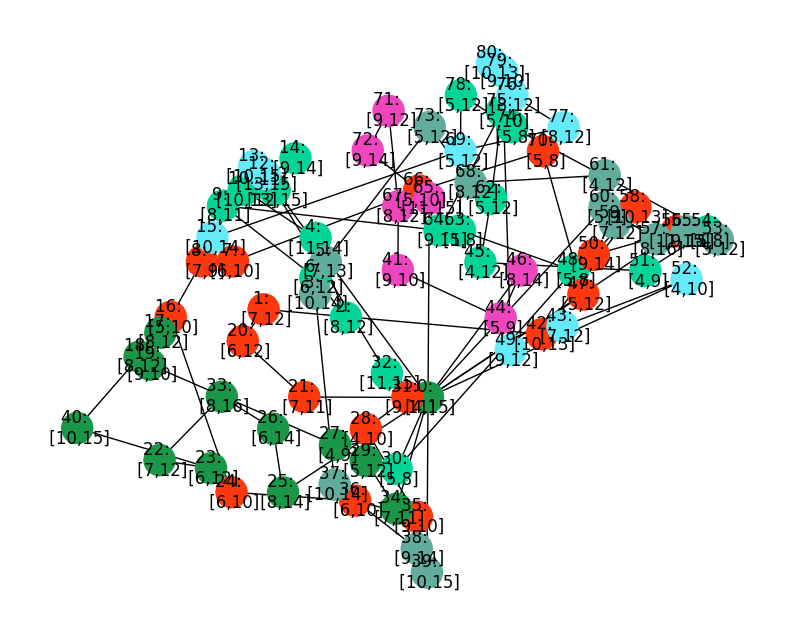

In [36]:
draw_graph(optimal_route)

In [37]:
model.draw_energy_plot(info['hist'])

## VEGSA

In [64]:
start_time = time.time()
Tmax = 400 
Tmin = 0
StepMax = 400
information = model.vegsa(
    x0= x0,
    PopSize= 120,
    ElitePopSize= 20,
    subPopSize=20,
    MaxGenerations= 200,
    localOptimumTime= 30,
    StepMax= StepMax,
    Tmin= Tmin,
    Tmax= Tmax,
    SAlocalEntropyTime= 30,
    cooling_operator= linear_additive_cooling(t_max=Tmax, t_min=Tmin, alpha=0.9, step_max=StepMax)
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")
print(x0)

GA init: 
generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23
generation: 24
generation: 25
generation: 26
generation: 27
generation: 28
generation: 29
generation: 30
generation: 31
generation: 32
generation: 33
generation: 34
generation: 35
generation: 36
generation: 37
generation: 38
generation: 39
generation: 40
generation: 41
generation: 42
generation: 43
generation: 44
generation: 45
generation: 46
generation: 47
generation: 48
generation: 49
generation: 50
generation: 51
generation: 52
generation: 53
generation: 54
generation: 55
generation: 56
generation: 57
generation: 58
generation: 59
generation: 60
generation: 61
generation: 62
generation: 63
generation: 64
generation: 65
generation: 66
generatio

In [65]:
print(information['x_best'])
print(information['e_best'])
print(information['temperature'])
print(information['time'])

[44 48 52 54 60 51 47 46  5  6  9 10 12 14 63 66  7  8 20 33 24 36 35 34
 38 39 25 37 31 49 42 43 59 58 56 57 50 28 30 29 27 23 22 19 41 64 55 53
 61 80 72 65 45 62 69 75 70 74 77 76 79 78 73 68 67 71 13 15 26 32  1 16
 17 18 40 21  2  3 11  4]
1.5143677560773063
0.0
401


In [ ]:
[44 47 63 70 74 69 77 76 43 41 64  9  6  1  5  4  3 32 29 30 27  7  8 16
 24 36 35 31 21 20  2 42 58 50 46 56 45 62 60 48 51 52 54 53 55 57 59 61
 68 67 11 12 72 65 49 34 22 23 25 66 73 78 75 79 80 71 14 13 10 15 38 39
 28 19 17 18 40 33 26 37]
1.6688740475071735
0.0
401

In [66]:
optimal_route3, df_summary3 = model.decoding(information['x_best'], summary=True)
df_summary3.head(100)

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,44,0.374643,0.009366,5,9,0.989587,0.010413
1,0,44,48,0.282726,0.007068,5,8,0.981729,0.007858
2,0,48,52,0.338232,0.008456,4,10,0.972328,0.009401
3,0,52,54,0.194267,0.004857,5,8,0.966929,0.005399
4,0,54,60,0.319787,0.007995,5,9,0.958040,0.008888
...,...,...,...,...,...,...,...,...,...
81,5,21,2,0.330779,0.008269,8,12,0.933311,0.009194
82,5,2,3,0.130138,0.003253,10,14,0.929694,0.003617
83,5,3,11,0.417804,0.010445,12,15,0.918081,0.011612
84,5,11,4,0.221339,0.005533,11,14,0.911929,0.006152


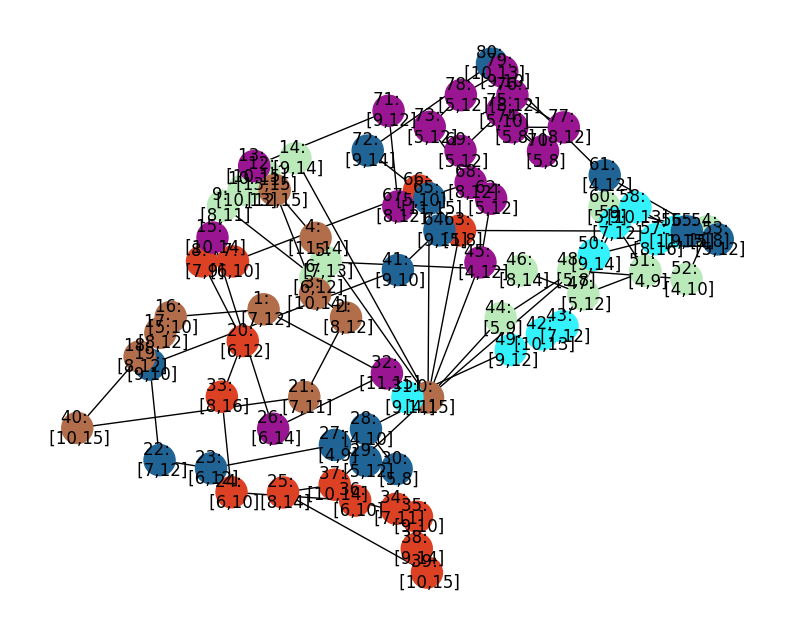

In [67]:
draw_graph(optimal_route3)

In [68]:
model.draw_energy_plot(information['hist'])